In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datafile into dataframes
wine_data = "Resources/white-wine-price-rating.csv"

In [2]:
wine_data = pd.read_csv(wine_data)
wine_data

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685
4591,Litmus Wines White Pinot 2015,Litmus Wines,White Pinot,2015,NaN,NaN,4.0,25,4.0,91,24.500,24.500,0.163265,0.163265
4592,Rollin Père et Fils Pernand-Vergelesses 'Les C...,Rollin Père et Fils,Pernand-Vergelesses 'Les Cloux',2017,Burgundy,Côte de Beaune White,4.0,25,4.1,330,20.160,20.160,0.198413,0.203373


In [3]:
wine_clean_data = wine_data.dropna()
wine_clean_data

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685


In [4]:
wine_clean_data = wine_clean_data.drop_duplicates(keep = 'first')
wine_clean_data

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685


In [5]:
# wine_cheap = < $100
wine_cheap = wine_clean_data[wine_clean_data['WinePrice'] < 100]
wine_cheap

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
372,Jermann W... Dreams Bianco (Were Dreams...) 2016,Jermann,W... Dreams Bianco (Were Dreams...),2016,Northern Italy,White,4.3,392,4.2,3406,73.115,73.115,0.058811,0.057444
373,Tolpuddle Chardonnay 2015,Tolpuddle,Chardonnay,2015,Australian,Chardonnay,4.3,146,4.2,787,67.165,67.165,0.064021,0.062533
397,Château de Béru Clos Béru Monopole Chablis 2012,Château de Béru,Clos Béru Monopole Chablis,2012,Burgundy,Chablis,4.1,108,4.1,602,61.500,61.500,0.066667,0.066667
422,Allende Martires Rioja 2013,Allende,Martires Rioja,2013,Spanish,Rioja White,4.6,30,4.4,297,98.000,98.000,0.046939,0.044898
463,Peter Michael L'Après-Midi Sauvignon Blanc 2015,Peter Michael,L'Après-Midi Sauvignon Blanc,2015,Californian,Sauvignon Blanc,4.5,84,4.3,967,86.000,86.000,0.052326,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685


In [6]:
# Set lists of countries with their regions manually
germany = ['German']
austria = ['Austrian']
spain = ['Spanish']
france = ['Burgundy', 'Northern Rhône', 'Bordeaux',
          'Languedoc-Roussillon','Southern Rhône', 
          'Jura', 'Upper Loire Valley', 'Loire',
          'Loire Muscadet', 'Alsace']
italy = ['Italian', 'Northern Italy', 'Central Italy', 'Southern Italy']
port = ['Southern Portugal', 'Northern Portugal', 'Portuguese']
greece = ['Greek Santorini', 'Greek']
canada = ['Canadian']
us = ['Californian', 'Napa Valley', 'Oregon']
chile = ['Chilean']
argentina = ['Argentinian']
australia = ['Australian']
new_zealand = ['New Zealand']
s_africa = ['South African']

# Add Country column
modified_data = wine_cheap.copy()
modified_data['Country'] = ''

# Set Values for Country column
for i in modified_data.index:
    
    if modified_data['Region'][i] in germany:
        modified_data.loc[i,'Country'] = 'Germany'
        
    elif modified_data['Region'][i] in austria:
        modified_data.loc[i,'Country'] = 'Austria'
        
    elif modified_data['Region'][i] in spain:
        modified_data.loc[i,'Country'] = 'Spain'
        
    elif modified_data['Region'][i] in france:
        modified_data.loc[i,'Country'] = 'France'
    
    elif modified_data['Region'][i] in italy:
        modified_data.loc[i,'Country'] = 'Italy'
    
    elif modified_data['Region'][i] in port:
        modified_data.loc[i,'Country'] = 'Portugal'
    
    elif modified_data['Region'][i] in greece:
        modified_data.loc[i,'Country'] = 'Greece'
    
    elif modified_data['Region'][i] in canada:
        modified_data.loc[i,'Country'] = 'Canada'
    
    elif modified_data['Region'][i] in us:
        modified_data.loc[i,'Country'] = 'US'
    
    elif modified_data['Region'][i] in chile:
        modified_data.loc[i,'Country'] = 'Chile'
    
    elif modified_data['Region'][i] in argentina:
        modified_data.loc[i,'Country'] = 'Argentina'
    
    elif modified_data['Region'][i] in australia:
        modified_data.loc[i,'Country'] = 'Australia'
        
    elif modified_data['Region'][i] in new_zealand:
        modified_data.loc[i,'Country'] = 'New Zealand'
        
    elif modified_data['Region'][i] in s_africa:
        modified_data.loc[i,'Country'] = 'South Africa'

In [19]:
# Bins
bins = [0,9.99,30,50,70,100]

# Labels
labels = ['< \$9.99', '\$10.00 - \$30.00', '\$31.00 - \$50.00', '\$51.00 - \$70.00', '\$71.00 - \$100']

modified_data['PriceRange'] = pd.cut(modified_data['WinePrice'], bins = bins, labels = labels)

by_pricerange = modified_data.groupby('PriceRange')

# Calculations
low_wine_rating_range = by_pricerange['WineRating'].min()
high_wine_rating_range = by_pricerange['WineRating'].max()
avg_wine_rating_range = by_pricerange['WineRating'].mean()

by_pricerange_df = pd.DataFrame({'Lowest Wine Rating (0-5)': low_wine_rating_range,
                            'Highest Wine Rating (0-5)': high_wine_rating_range,
                            'Overall Average Rating (0-5)': avg_wine_rating_range})

by_pricerange_df


,Lowest Wine Rating (0-5),Highest Wine Rating (0-5),Overall Average Rating (0-5)
PriceRange,,,
< \$9.99,NaN,NaN,NaN
\$10.00 - \$30.00,3.5,4.4,4.021379
\$31.00 - \$50.00,3.7,4.6,4.112618
\$51.00 - \$70.00,3.8,4.5,4.187437
\$71.00 - \$100,3.8,4.5,4.258513


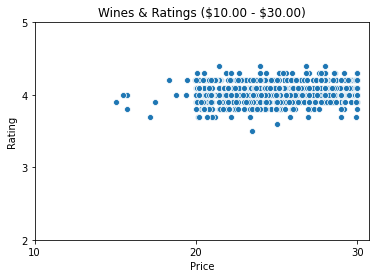

In [8]:
p10_30 = modified_data[modified_data['PriceRange'] == "\$10.00 - \$30.00"]

# Plotting
sns.scatterplot(x = 'WinePrice', y = 'WineRating', data = p10_30)

plt.xticks(np.arange(10, 31, 10))
plt.yticks(np.arange(2, 6, 1))
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Wines & Ratings (\$10.00 - \$30.00)');

plt.savefig('WinePrice_Ratings$10.00-$30.00.png');

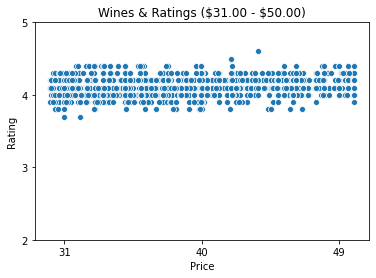

In [9]:
p31_50 = modified_data[modified_data['PriceRange'] == "\$31.00 - \$50.00"]

# Plotting
sns.scatterplot(x = 'WinePrice', y = 'WineRating', data = p31_50)

plt.xticks(np.arange(31, 51, 9))
plt.yticks(np.arange(2, 6, 1))
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Wines & Ratings (\$31.00 - \$50.00)');
plt.savefig('WinePrice_Ratings$31.00-$50.00.png');

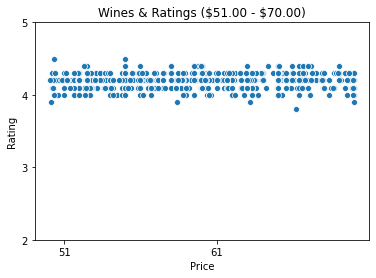

In [10]:
p51_70 = modified_data[modified_data['PriceRange'] == "\$51.00 - \$70.00"]

# Plotting
sns.scatterplot(x = 'WinePrice', y = 'WineRating', data = p51_70)

plt.xticks(np.arange(51, 71, 10))
plt.yticks(np.arange(2, 6, 1))
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Wines & Ratings (\$51.00 - \$70.00)');

plt.savefig('WinePrice_Ratings$51.00-$70.00.png');

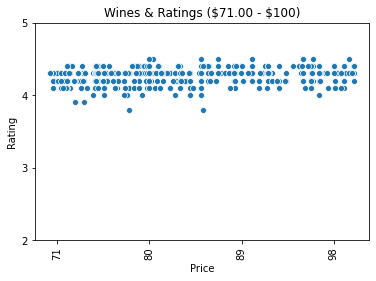

In [11]:
p71_100 = modified_data[modified_data['PriceRange'] == "\$71.00 - \$100"]

# Plotting
sns.scatterplot(x = 'WinePrice', y = 'WineRating', data = p71_100)

plt.xticks(np.arange(71, 101, 9), rotation = 'vertical')
plt.yticks(np.arange(2, 6, 1))
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Wines & Ratings (\$71.00 - \$100)');
plt.savefig('WinePrice_Ratings$71.00-$100.png');

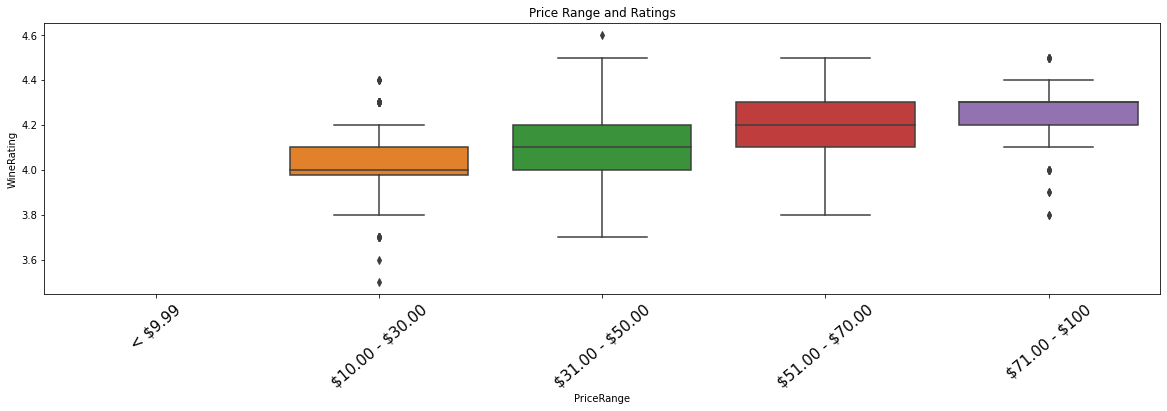

In [15]:
by_pricerange = modified_data.sort_values(by = 'PriceRange')

# Plot Size
plt.figure(figsize=(20,5))
plt.xticks(fontsize= 15, rotation='40')
plt.title('Price Range and Ratings');
sns.boxplot(x = 'PriceRange', y = 'WineRating', data = by_pricerange);

plt.savefig('Boxplot_Price Range and Ratings');

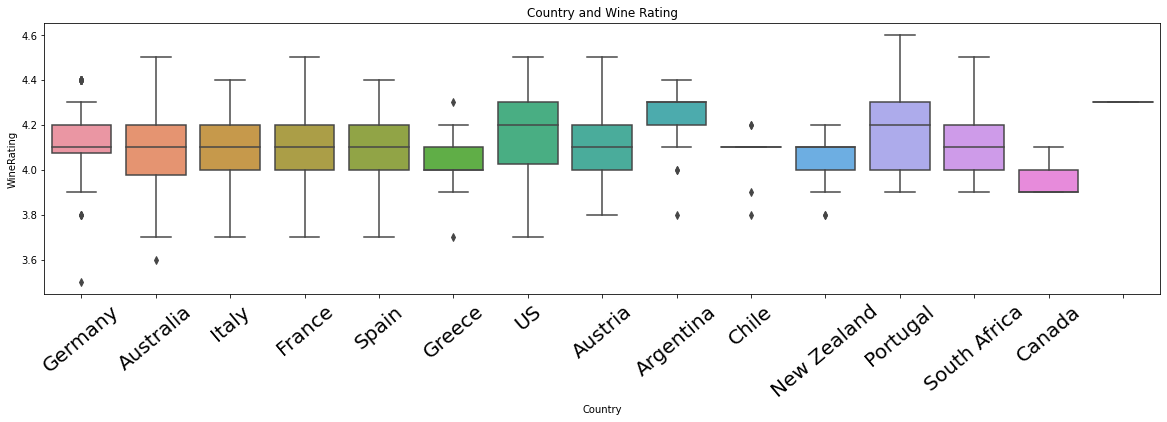

In [16]:
# Sort data by Country
country = modified_data.sort_values(by = 'WineRating')

# Plot Size
plt.figure(figsize=(20,5))
plt.xticks(fontsize= 20, rotation='40')
plt.title('Country and Wine Rating')
sns.boxplot(x = 'Country', y = 'WineRating', data = country);
plt.savefig('Boxplot_Country and Wine Rating');

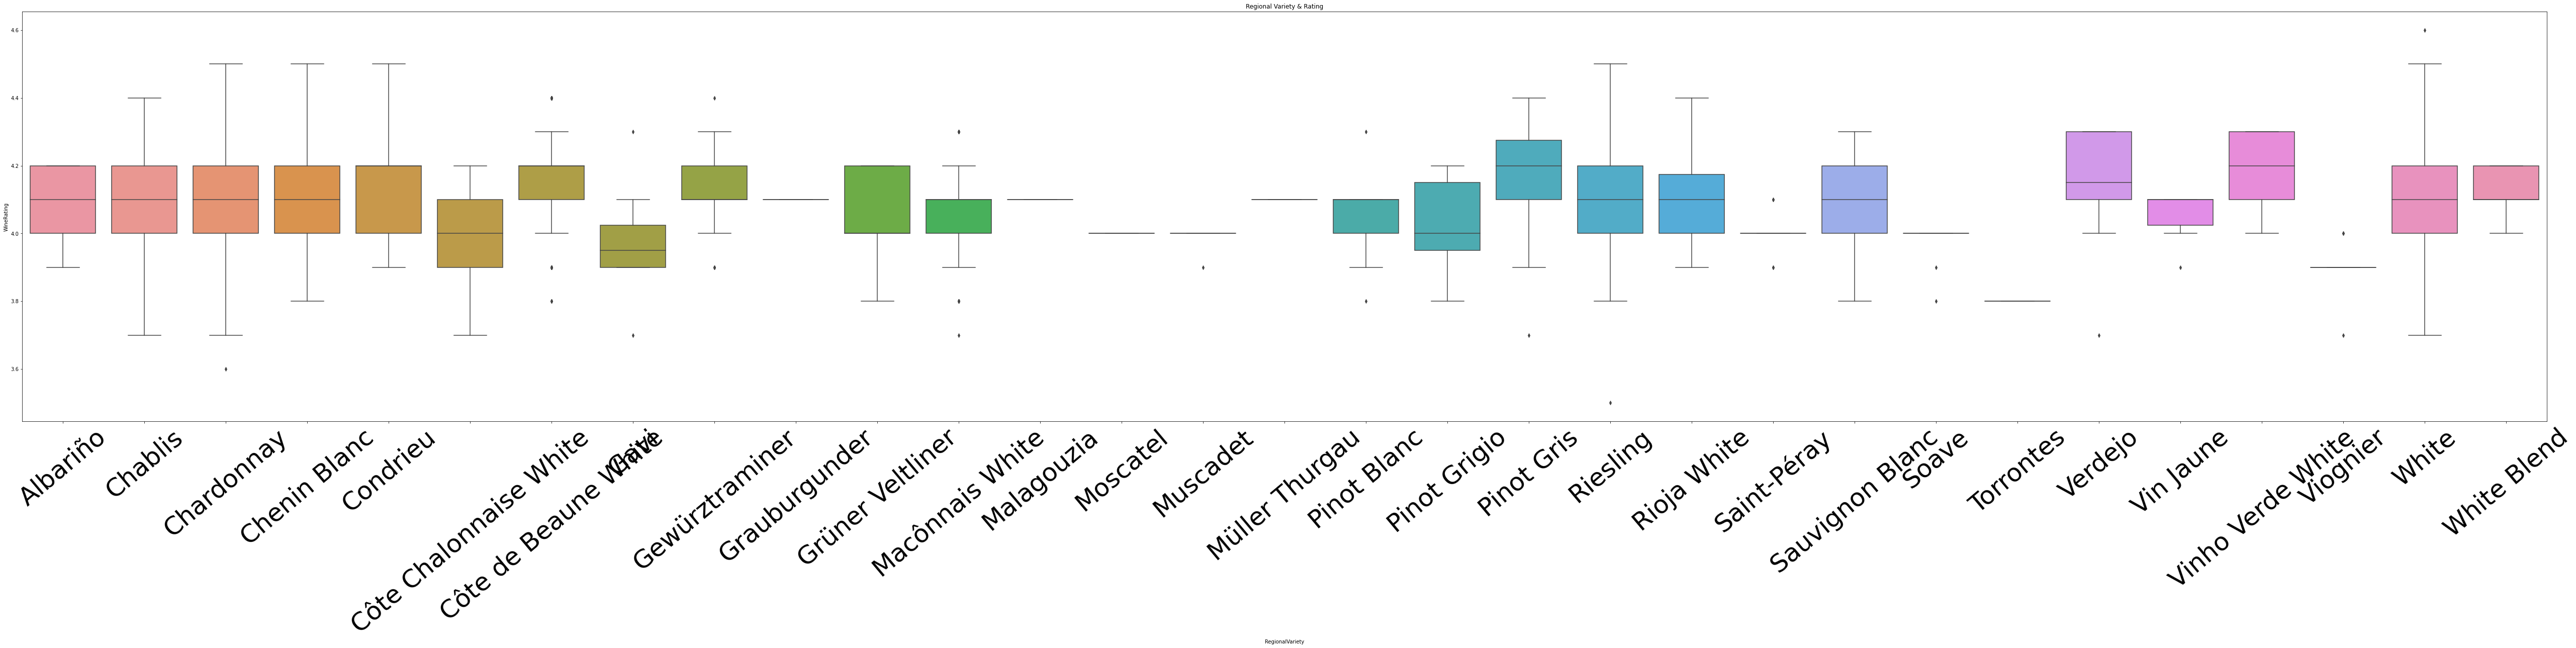

In [17]:
# Sort data by Variety
variety = modified_data.sort_values(by = 'RegionalVariety')

# Plot
plt.figure(figsize=(90,15))
plt.xticks(fontsize= 50, rotation='40')
plt.title('Regional Variety & Rating')
sns.boxplot(x = 'RegionalVariety', y = 'WineRating', data = variety);
plt.savefig('Boxplot_Variety and Rating');

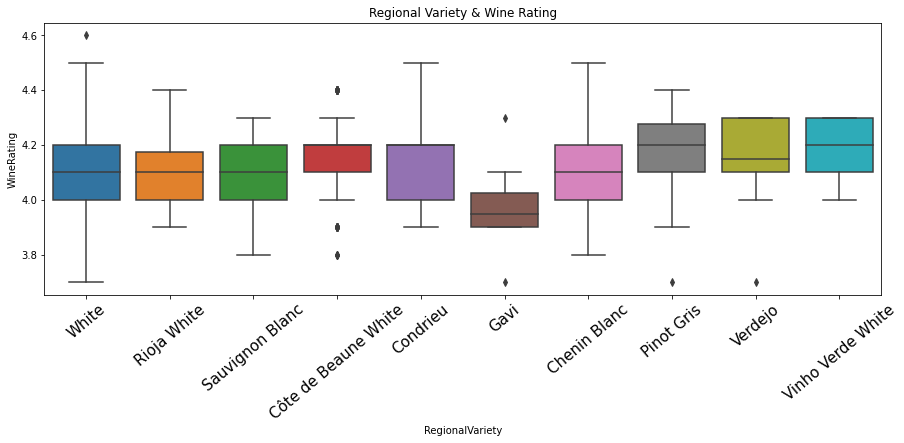

In [18]:
# Get top 10 Varieties accdg to Ratings
top_10_variety = modified_data[['RegionalVariety','WineRating']].drop_duplicates('RegionalVariety').sort_values(by = 'WineRating', ascending=False).head(10)

# Making a list of those Varieties
top_10_variety_list = list(top_10_variety['RegionalVariety'].values)

# Filter data to have only those Varieties
top_10_variety = modified_data[modified_data['RegionalVariety'].isin(top_10_variety_list)]

# Plot Size
plt.figure(figsize=(15,5))
plt.xticks(fontsize= 15, rotation='40')
plt.title('Regional Variety & Wine Rating')
sns.boxplot(x = 'RegionalVariety', y = 'WineRating', data = top_10_variety);
plt.savefig('Boxplot_top10variety and rating');